In [ ]:
import os
import json
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ast import literal_eval

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# create data folder in your Google Drive
data_folder_name = 'openFDA_device_data'
parent_dir = '/content/drive/MyDrive'
data_folder_path = os.path.join(parent_dir, data_folder_name)

os.chdir(parent_dir)

if not os.path.exists(data_folder_path):
  os.mkdir(data_folder_path)
  print(f'{data_folder_path} directory created.')

os.chdir(data_folder_path)

In [ ]:
os.getcwd()

'/content/drive/MyDrive/openFDA_device_data'

In [ ]:
df = pd.read_csv('device_2023_q2.csv')

<ipython-input-4-45d484c99d1c>:1: DtypeWarning: Columns (10,21,24,78,120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('device_2023_q2.csv')


In [ ]:
df.columns

Index(['manufacturer_contact_zip_ext', 'manufacturer_g1_address_2',
       'event_location', 'report_to_fda', 'manufacturer_contact_t_name',
       'manufacturer_contact_state', 'manufacturer_link_flag',
       'manufacturer_contact_address_2', 'manufacturer_g1_city',
       'manufacturer_contact_address_1',
       ...
       'openfda.registration_number', 'openfda.fei_number', 'mdr_text_key_x',
       'text_type_code_x', 'patient_sequence_number_x', 'text_x',
       'mdr_text_key_y', 'text_type_code_y', 'patient_sequence_number_y',
       'text_y'],
      dtype='object', length=137)

In [ ]:
IMPORTANT = ['adverse_event_flag', 'product_problems', 'product_problem_flag', 'date_of_event', 'event_type', 'previous_use_code', 'device_age_text',
             'date_received', 'patient_age', 'patient_sex', 'patient_weight', 'patient_ethnicity', 'patient_race', 'patient_problems', 'type_of_report',
             'distributor_name', 'distributor_state', 'manufacturer_name', 'event_key', 'openfda.medical_specialty_description', 'device_date_of_manufacturer']
#df = df[IMPORTANT]

Text(0.5, 1.0, 'Adverse Event Flag Distribution')

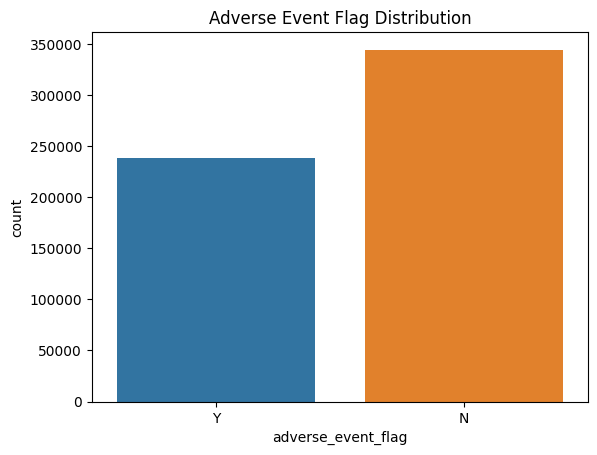

In [ ]:
sns.countplot(x='adverse_event_flag', data=df).set_title("Adverse Event Flag Distribution")

Text(0.5, 1.0, 'Product Problem Flag Distribution')

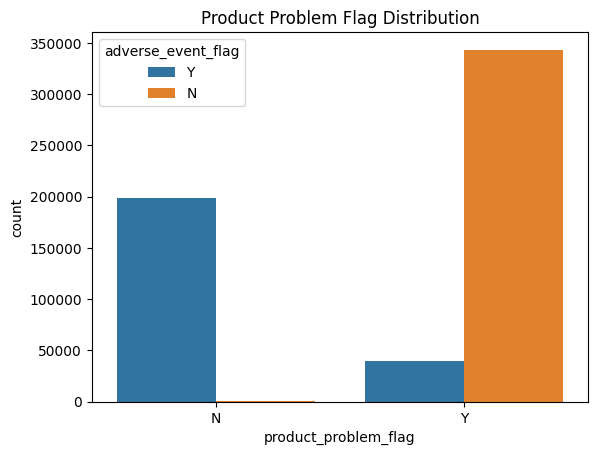

In [ ]:
sns.countplot(x=df['product_problem_flag'], hue='adverse_event_flag', data=df).set_title('Product Problem Flag Distribution')

Text(0.5, 1.0, 'Adverse Event Types')

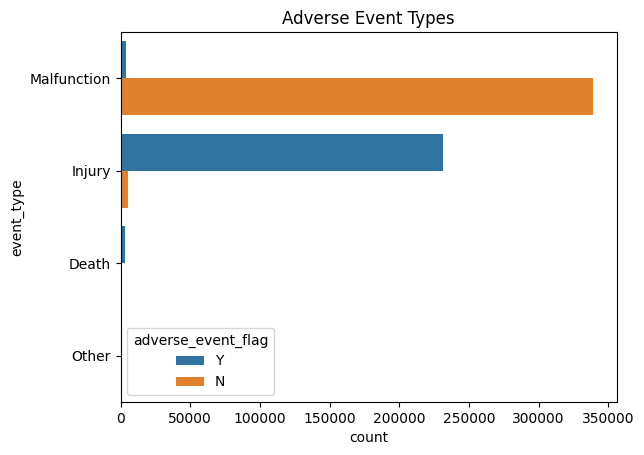

In [ ]:
sns.countplot(y='event_type', hue='adverse_event_flag', data=df, order = df['event_type'].value_counts().index).set_title('Adverse Event Types')

Text(0.5, 1.0, 'Previous Use Codes')

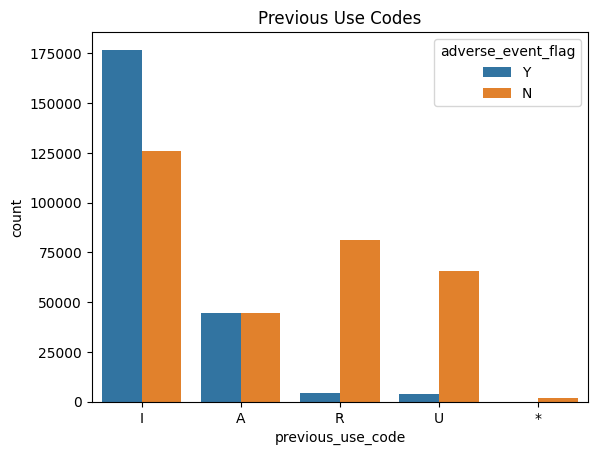

In [ ]:
sns.countplot(x='previous_use_code', hue='adverse_event_flag', data=df, order = df['previous_use_code'].value_counts().index).set_title('Previous Use Codes')

Text(0.5, 1.0, 'Patient Sex')

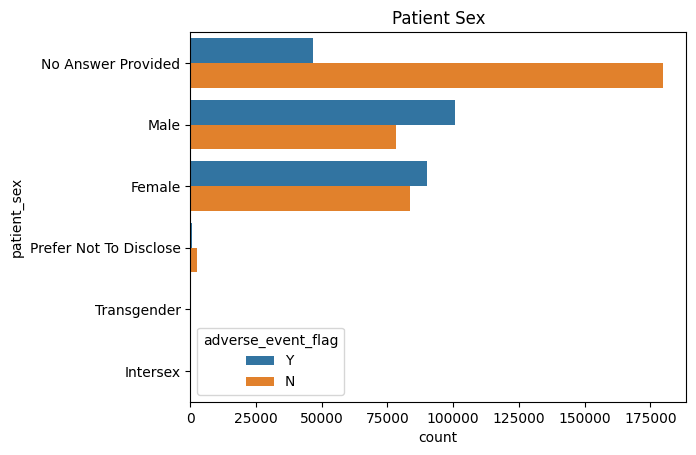

In [ ]:
sns.countplot(y='patient_sex', hue='adverse_event_flag', data=df, order = df['patient_sex'].value_counts().index).set_title('Patient Sex')

Text(0.5, 1.0, 'Patient Ethnicity')

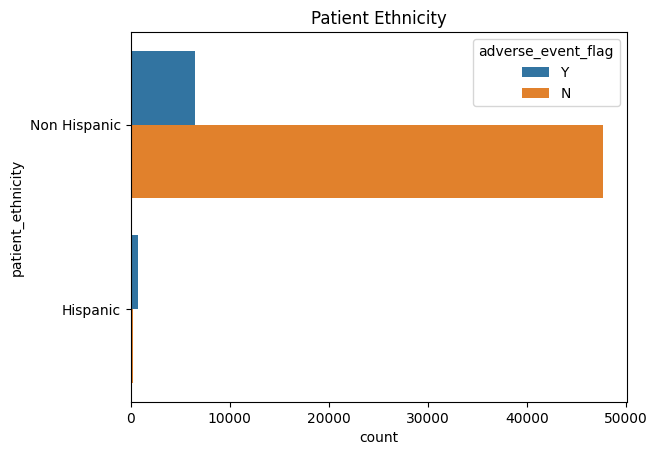

In [ ]:
sns.countplot(y='patient_ethnicity', hue='adverse_event_flag', data=df, order = df['patient_ethnicity'].value_counts().index).set_title('Patient Ethnicity')

Text(0.5, 1.0, 'Patient Race')

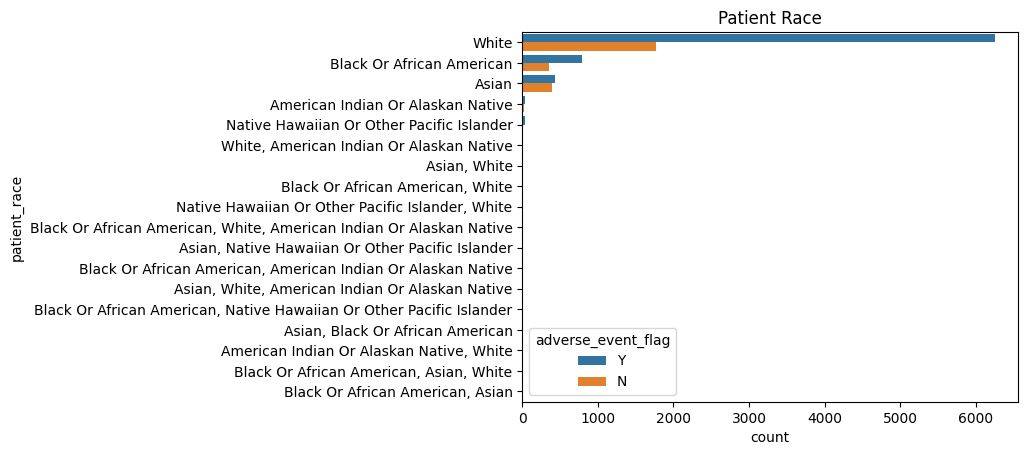

In [ ]:
sns.countplot(y='patient_race', hue='adverse_event_flag', data=df, order = df['patient_race'].value_counts().index).set_title('Patient Race')

In [ ]:
#sns.countplot(y='device_operator', hue='adverse_event_flag', data=df, order = df['device_operator'].value_counts().index).set_title('Device Operators')

In [ ]:
df['openfda.medical_specialty_description']

0                            Dental
1                Clinical Chemistry
2                    Anesthesiology
3         Gastroenterology, Urology
4                Clinical Chemistry
                    ...            
582425             General Hospital
582426               Anesthesiology
582427     General, Plastic Surgery
582428           Clinical Chemistry
582429           Clinical Chemistry
Name: openfda.medical_specialty_description, Length: 582430, dtype: object

In [ ]:
#sns.countplot(y='distributor_name', hue='adverse_event_flag', data=df, order = df['distributor_name'].value_counts().index).set_title('Distributors')

In [ ]:
df['product_problems'] = df['product_problems'].apply(lambda x: x if isinstance(x, float) else literal_eval(x))
df['patient_problems'] = df['patient_problems'].apply(literal_eval)
df['type_of_report'] = df['type_of_report'].apply(literal_eval)
df['openfda.medical_specialty_description'] = df['openfda.medical_specialty_description'].str.split(',')

Text(0.5, 1.0, '10 most frequent Product Problems')

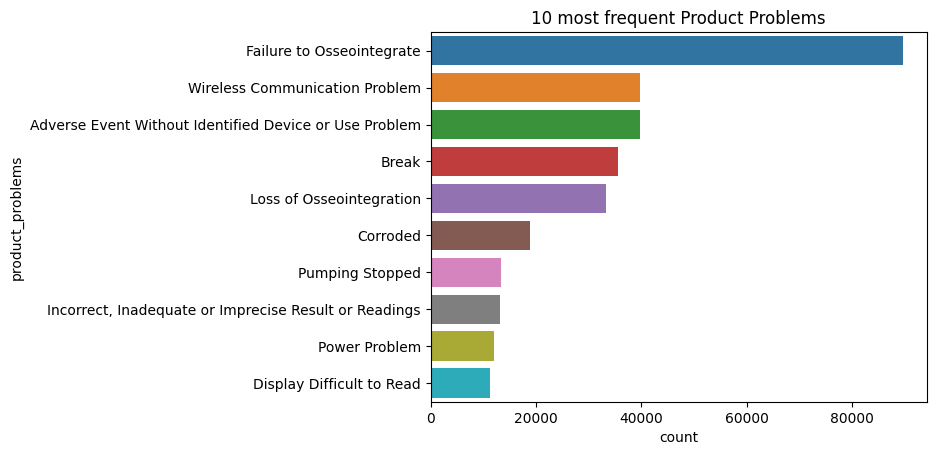

In [ ]:
sns.countplot(y=df['product_problems'].explode(), order=df['product_problems'].explode().value_counts().iloc[:10].index).set_title("10 most frequent Product Problems")

Text(0.5, 1.0, '10 most frequent Patient Problems')

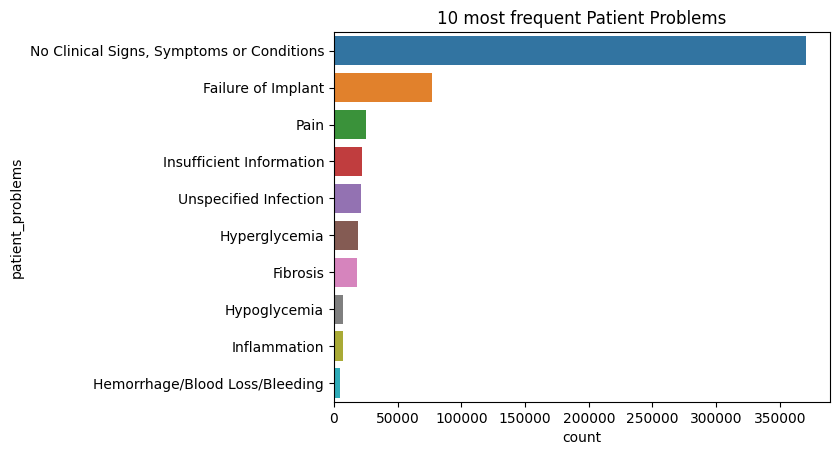

In [ ]:
sns.countplot(y=df['patient_problems'].explode(), order=df['patient_problems'].explode().value_counts().iloc[:10].index).set_title('10 most frequent Patient Problems')

Text(0.5, 1.0, 'Medical Descriptions')

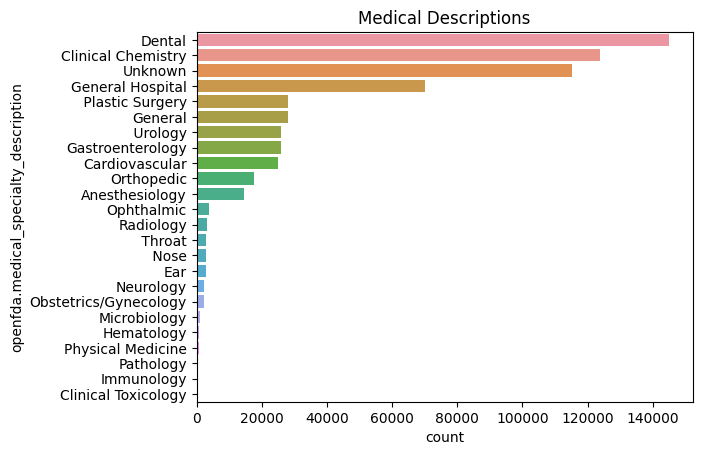

In [ ]:
sns.countplot(y=df['openfda.medical_specialty_description'].explode(), order=df['openfda.medical_specialty_description'].explode().value_counts().index).set_title('Medical Descriptions')

Text(0.5, 1.0, 'Type of Report')

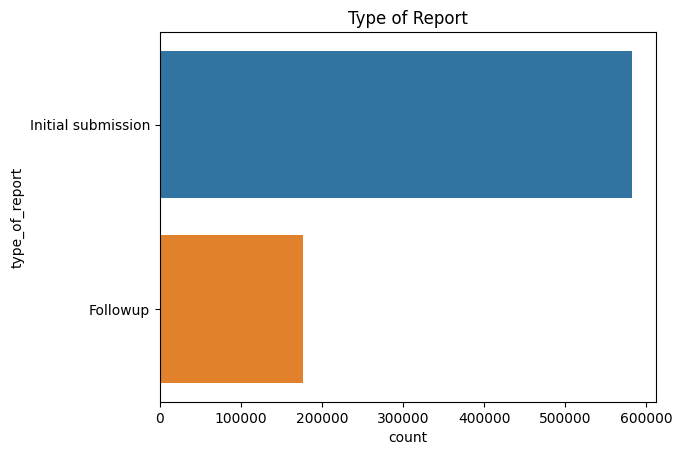

In [ ]:
sns.countplot(y=df['type_of_report'].explode(), order=df['type_of_report'].explode().value_counts().iloc[:2].index).set_title('Type of Report')

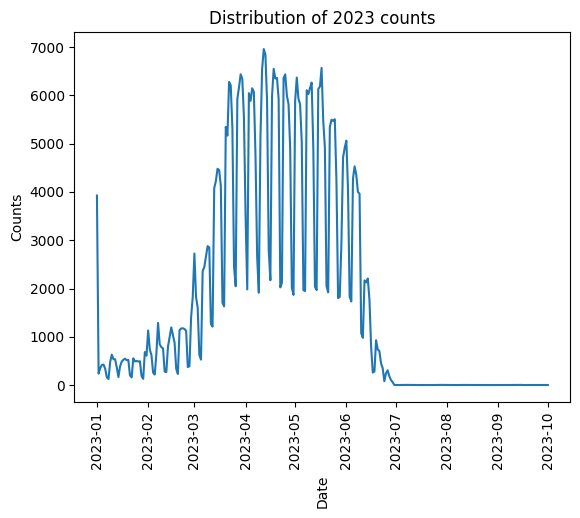

In [ ]:
df['date_of_event'] = pd.to_datetime(df['date_of_event'], format="%Y%m%d")
plot = sns.lineplot(x=df[df['date_of_event'].dt.year >= 2023]['date_of_event'].value_counts().sort_index().index, y=df[df['date_of_event'].dt.year >= 2023]['date_of_event'].value_counts().sort_index()).set_title('Distribution of 2023 counts')
plt.xlabel('Date', rotation=90)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['date_received'] = pd.to_datetime(df['date_received'], format="%Y%m%d")

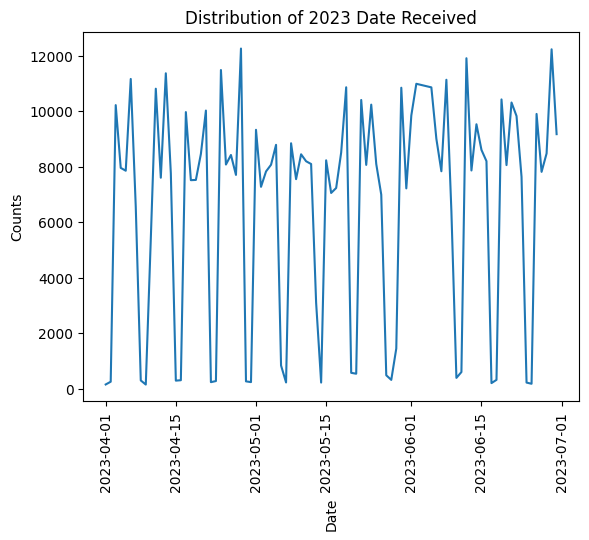

In [ ]:
sns.lineplot(x=df['date_received'].value_counts().sort_index().index, y=df['date_received'].value_counts().sort_index()).set_title('Distribution of 2023 Date Received')
plt.xlabel('Date', rotation=90)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Device Age in Years')

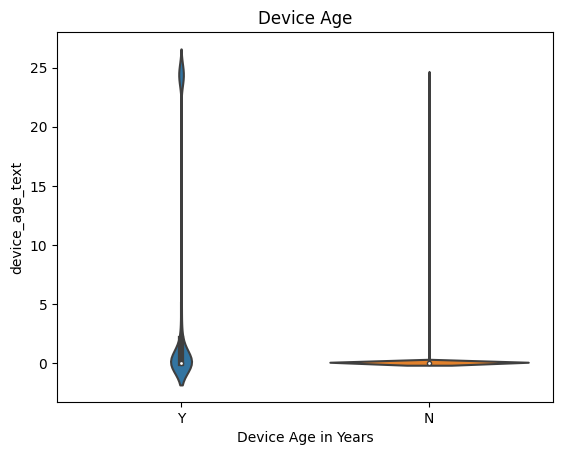

In [ ]:
df['device_age_text'] = df['device_age_text'].str.split(' ').apply(lambda x: x if isinstance(x, float) else 0 if len(x) == 1 else float(x[0])/12 if x[1] == 'MO' else float(x[0])/365 if x[1] == 'DA' else float(x[0]))
plot = sns.violinplot(y=df['device_age_text'], x=df['adverse_event_flag']).set_title('Device Age')
plt.xlabel('Device Age in Years')

Text(0.5, 0, 'Patient Age in Years')

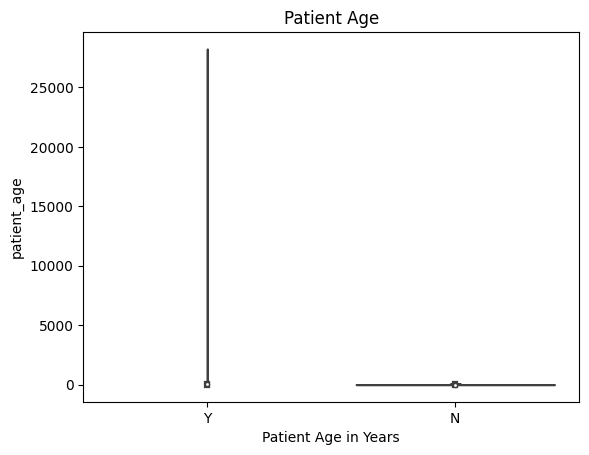

In [ ]:
df['patient_age'] = df['patient_age'].str.split(' ').apply(lambda x: 0 if isinstance(x, float) else 0 if len(x) == 1
                                                           else float(x[0])/12 if x[1] == 'MO'
                                                           else float(x[0])/365 if x[1] == 'DA'
                                                           else float(x[0])/52 if x[1] == 'WK'
                                                           else float(x[0]))
plot = sns.violinplot(y=df['patient_age'], x=df['adverse_event_flag'], fliersize=3).set_title('Patient Age')
plt.xlabel('Patient Age in Years')

In [ ]:
df['adverse_event_flag']

0         Y
1         N
2         N
3         N
4         N
         ..
582425    N
582426    N
582427    N
582428    Y
582429    N
Name: adverse_event_flag, Length: 582430, dtype: object

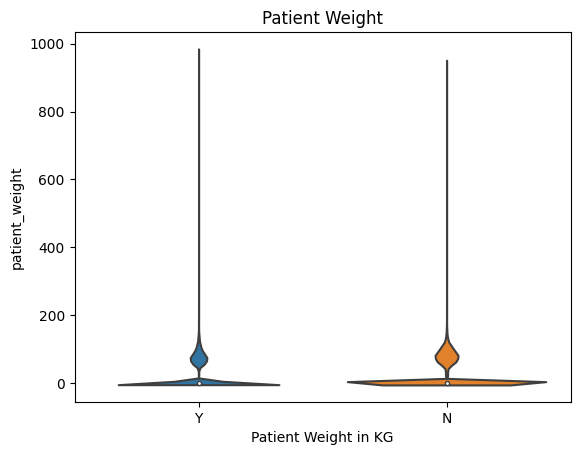

In [ ]:
df['patient_weight'] = df['patient_weight'].str.split(' ').apply(lambda x: 0 if isinstance(x, float) else 0 if x[0] == 'KG' else float(x[0]))
plot = sns.violinplot(y='patient_weight', x='adverse_event_flag', data=df, fliersize=3).set_title('Patient Weight')
plt.xlabel('Patient Weight in KG')
plt.show()

In [ ]:
df.to_csv('device_2023_q2_clean.csv')